In [1]:
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import pandas as pd
import math 
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
#measure error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
#ARIMA model 
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [2]:
df_train=pd.read_csv('Tesla_train.csv',parse_dates=['Date'],index_col='Date') 
df_train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,246.169998,3022600
2017-03-14,246.110001,258.119995,246.020004,258.000000,258.000000,7598400
2017-03-15,257.000000,261.000000,254.270004,255.729996,255.729996,5330800


In [3]:
df_test=pd.read_csv('Tesla_test.csv',parse_dates=['Date'],index_col='Date') 
df_test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-20,260.600006,264.549988,258.820007,261.920013,261.920013,3614300
2017-03-21,262.829987,264.799988,250.240005,250.679993,250.679993,6908600
2017-03-22,251.559998,255.070007,250.509995,255.009995,255.009995,4059300
2017-03-23,255.389999,257.670013,253.300003,254.779999,254.779999,3320200
2017-03-24,255.699997,263.890015,255.009995,263.160004,263.160004,5647300
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


# Seasonal differencing

In [4]:
train_diff=df_train.diff(periods=1)
train_diff=train_diff.fillna(0)
train_diff

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2010-06-30,6.790001,5.420000,5.759998,-0.059999,-0.059999,-1579200.0
2010-07-01,-0.790001,-4.500000,-3.029999,-1.870001,-1.870001,-8968300.0
2010-07-02,-2.000000,-2.820000,-1.560001,-2.759998,-2.759998,-3079000.0
2010-07-06,-3.000000,-3.100000,-2.879999,-3.090000,-3.090000,1727100.0
...,...,...,...,...,...,...
2017-03-13,-1.390000,0.350006,-0.220001,2.479996,2.479996,-43700.0
2017-03-14,1.289994,11.269989,3.240005,11.830002,11.830002,4575800.0
2017-03-15,10.889999,2.880005,8.250000,-2.270004,-2.270004,-2267600.0


In [5]:
test_diff=df_test.diff(periods=1)
test_diff=test_diff.fillna(0)
test_diff

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-20,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2017-03-21,2.229981,0.250000,-8.580002,-11.240020,-11.240020,3294300.0
2017-03-22,-11.269989,-9.729981,0.269990,4.330002,4.330002,-2849300.0
2017-03-23,3.830001,2.600006,2.790008,-0.229996,-0.229996,-739100.0
2017-03-24,0.309998,6.220002,1.709992,8.380005,8.380005,2327100.0
...,...,...,...,...,...,...
2020-01-28,26.500000,12.369996,18.799988,8.880004,8.880004,-1819600.0
2020-01-29,7.200012,12.989990,9.349976,14.089966,14.089966,6013000.0
2020-01-30,56.729981,61.080017,50.570007,59.820008,59.820008,11204200.0


In [6]:
result_train= adfuller(train_diff['Adj Close'])
print('ADF statistic: %f' %result_train[0])
print('p-value: %f' %result_train[1])
print('critical values:')
for key, value in result_train[4].items():
    print('\t%s: %.3f'%(key,value))

ADF statistic: -39.860036
p-value: 0.000000
critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [7]:
result_test= adfuller(test_diff['Adj Close'])
print('ADF statistic: %f' %result_test[0])
print('p-value: %f' %result_test[1])
print('critical values:')
for key, value in result_test[4].items():
    print('\t%s: %.3f'%(key,value))

ADF statistic: -14.879747
p-value: 0.000000
critical values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


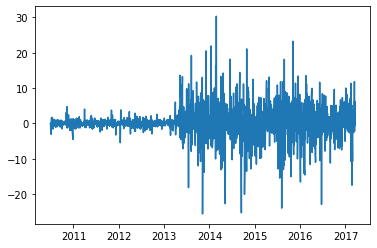

In [8]:
plt.plot(train_diff.index, train_diff['Adj Close'], label='train')

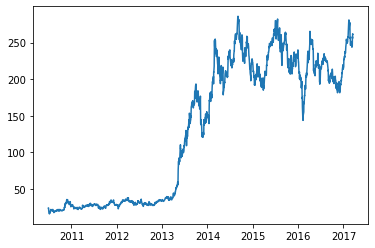

In [9]:
plt.plot(df_train.index, df_train['Adj Close'], label='train')

# Naive 1 method 

## a. Traning set 

In [10]:
predict1=[]
for i in range (0,1692):
    if i == 0:
            predict1.append(0)
    else:
            predict1.append(df_train['Adj Close'].iloc[i-1])
df_train['Naive prediction']=predict1
df_train

,Open,High,Low,Close,Adj Close,Volume,Naive prediction
Date,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,0.000000
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,23.889999
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,23.830000
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,21.959999
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,19.200001
...,...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,246.169998,3022600,243.690002
2017-03-14,246.110001,258.119995,246.020004,258.000000,258.000000,7598400,246.169998
2017-03-15,257.000000,261.000000,254.270004,255.729996,255.729996,5330800,258.000000


<AxesSubplot:xlabel='Date'>

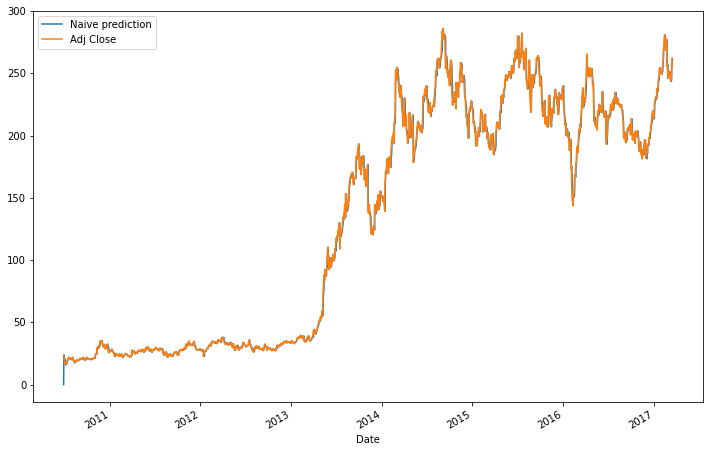

In [11]:
plt.figure(figsize=(12, 8))
df_train['Naive prediction'].plot(legend=True)
df_train['Adj Close'].plot(legend=True)

### Measure error function 

In [12]:
def measure_error(actual,predict):
    dict_error=[{'MAPE':mean_absolute_percentage_error(actual,predict),
           'MAE':mean_absolute_error(actual,predict),
           'MSE':mean_squared_error(actual,predict),
          'RMSE':np.sqrt(mean_squared_error(actual,predict))}]
    error=pd.DataFrame(dict_error)
    return error

In [13]:
measure_error(df_train['Adj Close'],df_train['Naive prediction'])

,MAPE,MAE,MSE,RMSE
0,0.023012,2.664385,19.614799,4.42886


## b. Testing set

In [14]:
df_test=pd.read_csv('Tesla_test.csv',parse_dates=['Date'],index_col='Date') 
df_test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-20,260.600006,264.549988,258.820007,261.920013,261.920013,3614300
2017-03-21,262.829987,264.799988,250.240005,250.679993,250.679993,6908600
2017-03-22,251.559998,255.070007,250.509995,255.009995,255.009995,4059300
2017-03-23,255.389999,257.670013,253.300003,254.779999,254.779999,3320200
2017-03-24,255.699997,263.890015,255.009995,263.160004,263.160004,5647300
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


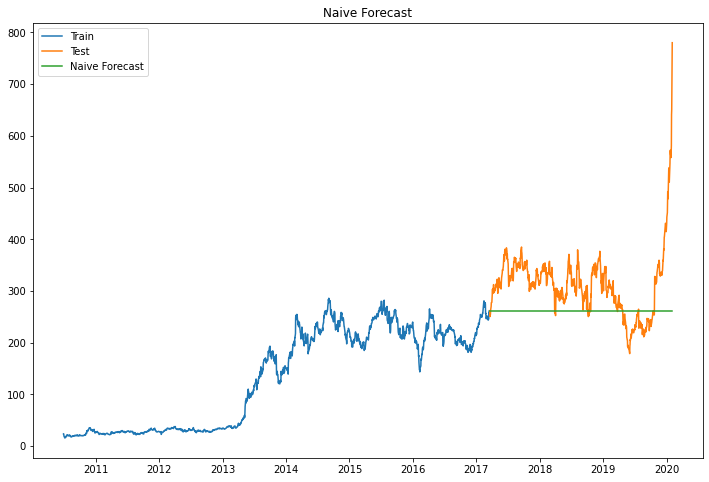

In [15]:
df_naive=df_test.copy()
dd= np.asarray(df_train['Adj Close'])
df_naive['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(df_train.index, df_train['Adj Close'], label='Train')
plt.plot(df_test.index,df_test['Adj Close'], label='Test')
plt.plot(df_naive.index,df_naive['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()


In [16]:
measure_error(df_naive['Adj Close'],df_naive['naive'])

,MAPE,MAE,MSE,RMSE
0,0.183404,61.986533,6454.211451,80.338107


# Linear regression (multiple)

In [17]:
X_train= train_diff[['Open','Close']].copy()
Y_train=train_diff[['Adj Close']].copy()
X_test=test_diff[['Open','Close']].copy()
Y_test=test_diff[['Adj Close']].copy()

regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [18]:
print('coefficient: \n',regression.coef_)
print('intercept: ',regression.intercept_)

coefficient: 
 [[-1.47171782e-16  1.00000000e+00]]
intercept:  [-5.55111512e-17]


In [19]:
Predicted=regression.predict(X_test)
Predicted
dfr1=Y_test.copy()
dfr1=dfr1.rename(columns={'Adj Close': 'actual'})
dfr1['predicted']=Predicted
dfr1

,actual,predicted
Date,,
2017-03-20,0.000000,-5.551115e-17
2017-03-21,-11.240020,-1.124002e+01
2017-03-22,4.330002,4.330002e+00
2017-03-23,-0.229996,-2.299960e-01
2017-03-24,8.380005,8.380005e+00
...,...,...
2020-01-28,8.880004,8.880004e+00
2020-01-29,14.089966,1.408997e+01
2020-01-30,59.820008,5.982001e+01


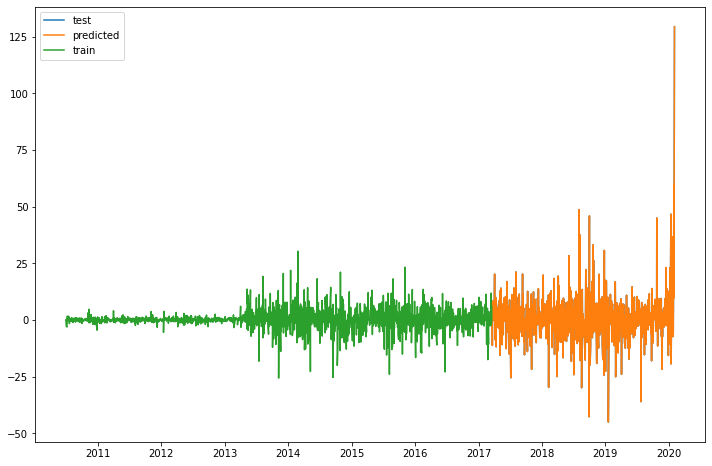

In [20]:
plt.figure(figsize=(12,8))
plt.plot(dfr1.index, dfr1['actual'], label='test')
plt.plot(dfr1.index, dfr1['predicted'], label='predicted')
plt.plot(Y_train.index, Y_train['Adj Close'], label='train')
plt.legend(loc='best')

In [21]:
measure_error(dfr1['actual'],dfr1['predicted'])

,MAPE,MAE,MSE,RMSE
0,0.000691,4.454597e-15,4.746934e-29,6.889800e-15


# Simple exponential smoothing

In [22]:
df_train.pop('Naive prediction')

Date
2010-06-29      0.000000
2010-06-30     23.889999
2010-07-01     23.830000
2010-07-02     21.959999
2010-07-06     19.200001
                 ...    
2017-03-13    243.690002
2017-03-14    246.169998
2017-03-15    258.000000
2017-03-16    255.729996
2017-03-17    262.049988
Name: Naive prediction, Length: 1692, dtype: float64

In [23]:
from statsmodels.tsa.api import SimpleExpSmoothing

### a. Train set


In [24]:
fit1= SimpleExpSmoothing(df_train['Adj Close']).fit(smoothing_level=0.6,optimized=False)
ses_train=df_train.copy()
ses_train['Alpha 0.6']=fit1.fittedvalues
ses_train

C:\Users\minhh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


,Open,High,Low,Close,Adj Close,Volume,Alpha 0.6
Date,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,23.889999
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,23.889999
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,23.854000
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,22.717599
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,20.607040
...,...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,246.169998,3022600,244.665208
2017-03-14,246.110001,258.119995,246.020004,258.000000,258.000000,7598400,245.568082
2017-03-15,257.000000,261.000000,254.270004,255.729996,255.729996,5330800,253.027233


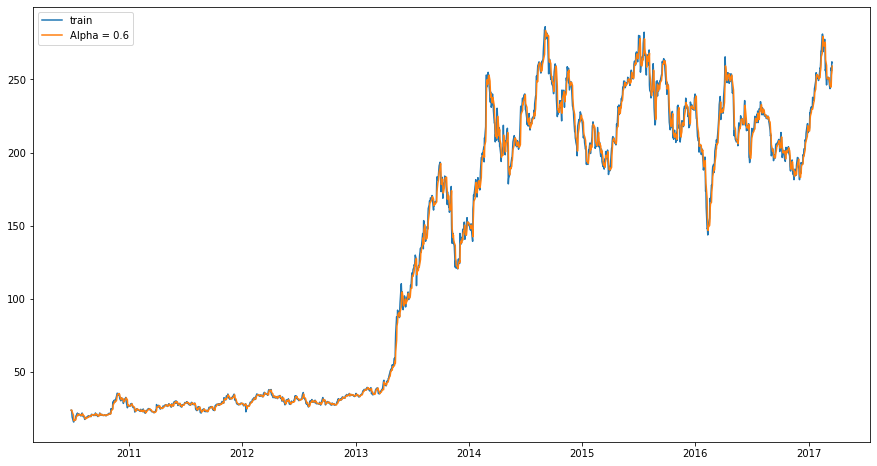

In [25]:
plt.figure(figsize=(15,8))
plt.plot(df_train['Adj Close'], label='train')
plt.plot(ses_train['Alpha 0.6'], label='Alpha = 0.6')
plt.legend(loc='best')

### Test set

In [26]:
ses_test=df_test.copy()
ses_test['Alpha 0.6']=pd.DataFrame(fit1.forecast(724).values,df_test.index)
ses_test

C:\Users\minhh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Open,High,Low,Close,Adj Close,Volume,Alpha 0.6
Date,,,,,,,
2017-03-20,260.600006,264.549988,258.820007,261.920013,261.920013,3614300,260.53582
2017-03-21,262.829987,264.799988,250.240005,250.679993,250.679993,6908600,260.53582
2017-03-22,251.559998,255.070007,250.509995,255.009995,255.009995,4059300,260.53582
2017-03-23,255.389999,257.670013,253.300003,254.779999,254.779999,3320200,260.53582
2017-03-24,255.699997,263.890015,255.009995,263.160004,263.160004,5647300,260.53582
...,...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,260.53582
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,260.53582
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,260.53582


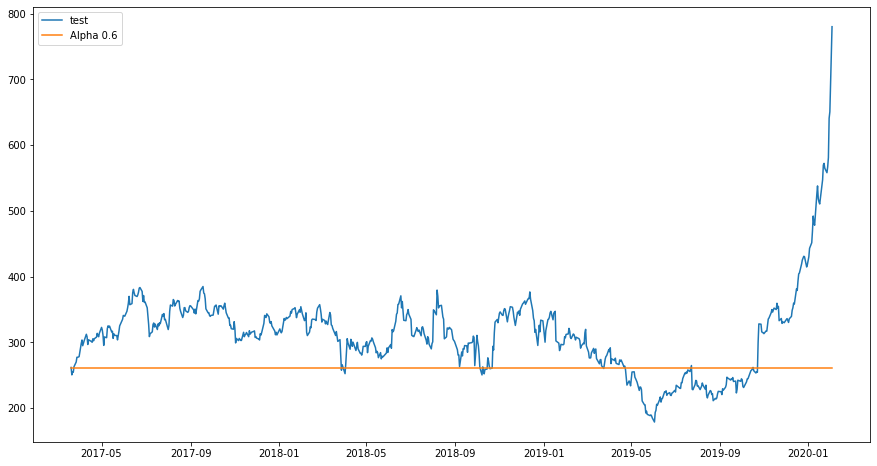

In [27]:
plt.figure(figsize=(15,8))
plt.plot(df_test['Adj Close'], label='test')
plt.plot(ses_test['Alpha 0.6'], label='Alpha 0.6')
plt.legend(loc='best')

### c. Error 

In [28]:
measure_error(ses_test['Adj Close'],ses_test['Alpha 0.6'])

,MAPE,MAE,MSE,RMSE
0,0.185004,62.581634,6553.572537,80.954138


In [29]:
measure_error(ses_train['Adj Close'],ses_train['Alpha 0.6'])

,MAPE,MAE,MSE,RMSE
0,0.025063,2.981356,23.437314,4.84121


# ARIMA

In [30]:
import warnings
warnings.filterwarnings("ignore")

### a. Train set

In [31]:
model=SARIMAX(df_train['Adj Close'],order=(1,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1692
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4900.865
Date:                Tue, 08 Mar 2022   AIC                           9807.731
Time:                        23:50:41   BIC                           9824.030
Sample:                             0   HQIC                          9813.766
                               - 1692                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0249      0.633      0.039      0.969      -1.215       1.265
ma.L1          0.0066      0.634      0.010      0.992      -1.237       1.250
sigma2        19.2696      0.313     61.558      0.000      18.656      19.883
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3585.90
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              28.00   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### b. Test set

In [32]:
pred2=model.predict(start=len(df_train),end=(len(df_train)+len(df_test)-1),typ='levels')
pred2.index=df_test.index
print(pred2)

Date
2017-03-20    261.481328
2017-03-21    261.480863
2017-03-22    261.480851
2017-03-23    261.480851
2017-03-24    261.480851
                 ...    
2020-01-28    261.480851
2020-01-29    261.480851
2020-01-30    261.480851
2020-01-31    261.480851
2020-02-03    261.480851
Name: predicted_mean, Length: 724, dtype: float64


In [33]:
pred1=model.predict(start=0,end=(len(df_train)-1),typ='levels')
pred1.index=df_train.index
print(pred1)

Date
2010-06-29      0.000000
2010-06-30     23.890014
2010-07-01     23.828108
2010-07-02     21.901029
2010-07-06     19.113337
                 ...    
2017-03-13    243.652246
2017-03-14    246.248471
2017-03-15    258.372617
2017-03-16    255.655927
2017-03-17    262.249822
Name: predicted_mean, Length: 1692, dtype: float64


In [34]:
from pmdarima import auto_arima
model_arima=auto_arima(df_train['Adj Close'],seasonal = True, m =12)
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1692
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4901.707
Date:                Tue, 08 Mar 2022   AIC                           9805.414
Time:                        23:50:59   BIC                           9810.847
Sample:                             0   HQIC                          9807.426
                               - 1692                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        19.2888      0.311     62.084      0.000      18.680      19.898
===================================================================================
Ljung-Box (L1) (Q):                   1.58   Jarque-Bera (JB):              3601.62
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):              28.11   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

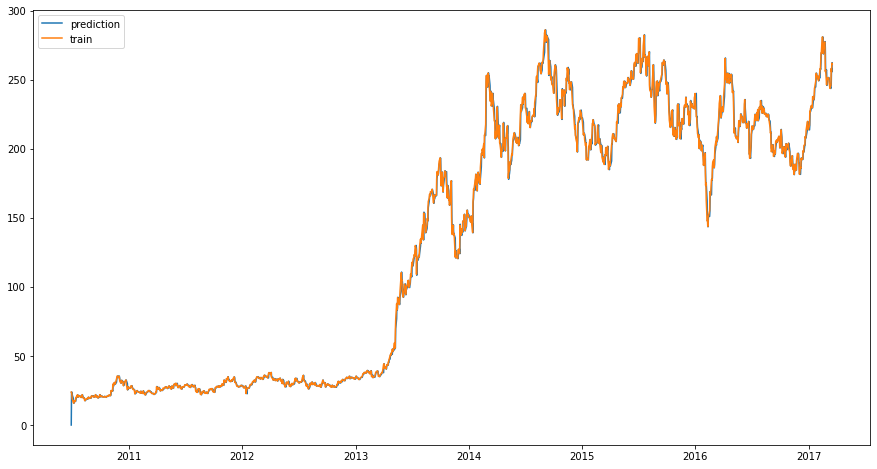

In [35]:
plt.figure(figsize=(15,8))
plt.plot(pred1, label='prediction')
plt.plot(df_train['Adj Close'], label='train')
plt.legend(loc='best')

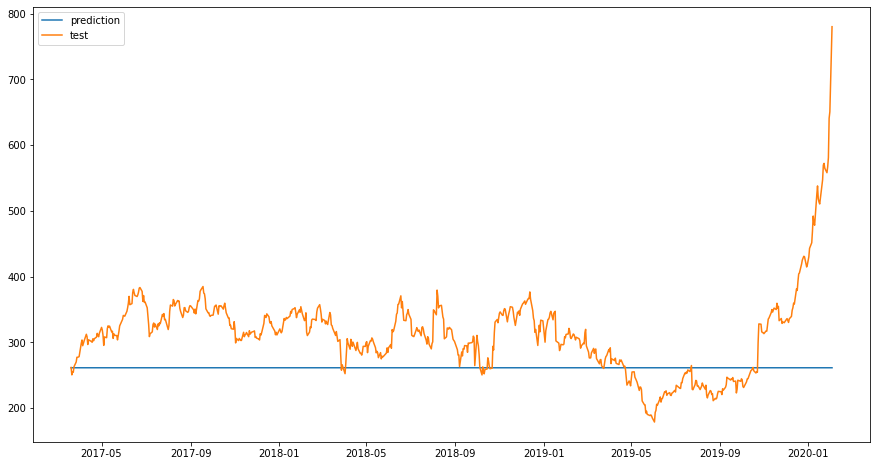

In [36]:
plt.figure(figsize=(15,8))
plt.plot(pred2, label='prediction')
plt.plot(df_test['Adj Close'], label='test')
plt.legend(loc='best')

### c. Error

In [37]:
measure_error(df_train['Adj Close'],pred1)

,MAPE,MAE,MSE,RMSE
0,0.023036,2.670555,19.595607,4.426693


In [38]:
measure_error(df_test['Adj Close'],pred2)

,MAPE,MAE,MSE,RMSE
0,0.183436,61.998329,6456.166719,80.350275
